# Exact diagonalization study of Heisenberg chain

This notebook contains breif notes and sample codes for solving Heisenberg chain using exact diagonalization method. It is for pedagogical purpose. The following text and codes are prepared by [Mr. Hongyu Lu（卢虹宇）](https://quantummc.xyz/members/hongyu-lu/) and [ZYM](https://quantummc.xyz/members/zi-yang-meng/).

##  Model

<font  face=Times color=darkblue size=3> The model hamiltonian is: $$H=J\sum_{<i,j>}\vec{S_i}\cdot \vec{S_j}=J\sum_{<i,j>}(\frac{1}{2}(S_i^+S_j^-+S_i^-S_j^+)+S_i^zS_j^z)$$ with the spin raising/lowering operators.<br><br> We consider $S=1/2$ 1-dimensional spin chain here.

## ED

<font  face=Times color=darkblue size=3>The basic idea is to construct the matrix of Hamiltonian and diagonalize it to get the eigenvalues and eigenvectors. <br><br> We choose the $S^z$ basis and use the bit representation. For example, for a N-spin chain, there are $2^N$ states and can be represented as: $$|0>=|\downarrow,\downarrow,...,\downarrow> (=00...0)$$ $$|1>=|\uparrow,\downarrow,...,\downarrow> (=00...1)$$ <br><br> To construct the matrix, we enumerate the states and $H_{ij}=<i|H|j>$. Please kind in mind that  that
* the pairs of spin raising/lowering opertors $S_i^+S_j^-$ can flip the spins thus providing the off-diagonal elements,
* while the $S_i^zS_j^z$ operators provide the diagonal elements.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### About String concatenation

In [2]:
# To show the process
a='0001'
b='1111'
c='22222'

In [3]:
print('a:',a)
print('b:',b)
print('c:',c)
print('bin(a):', bin(10))

a: 0001
b: 1111
c: 22222
bin(a): 0b1010


In [4]:
print('concatenation:a+b+c:',a+b+c)

concatenation:a+b+c: 0001111122222


#### Code

In [69]:
# set parameters
N=2
dimension=2**N
#spin chain with all spin-down
z='0'*N
# initialize hamiltonian
H=np.zeros((dimension,dimension))
z

'00'

In [70]:
# Matrix Construction
for a in range(dimension):
    state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain # make the length equal to N
    print(state_chain)
  # for PBC, we set i in range(N)
  # for OBC, we set i in range(N-1)
    for i in range(N-1):
        j=np.mod(i+1,N)
 #       print(state_chain)
        if state_chain[i]==state_chain[j]: # i=j only diagonal elements
            H[a,a]+=0.25
#            print('a:',a)
        else:                              # else, the raising/lowering operators also have contributions
            H[a,a]-=0.25
            # then exchange i,j
            element_i=state_chain[i]
            element_j=state_chain[j]
            #flip
            if j==0:
#here we are doing the concatenation of string (you can try other methods)
#                    print(state_chain)
                state_chain1=element_i+state_chain[1:N-1]+element_j
            else:
                state_chain1=state_chain[0:i]+element_j+element_i+state_chain[j+1:]
#            print(state_chain)
            b=int(state_chain1,2)
#            print('a:',a)
#            print('b:',b)
            H[a,b]+=0.5

00
01
10
11


In [71]:
H

array([[ 0.25,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.25,  0.5 ,  0.  ],
       [ 0.  ,  0.5 , -0.25,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.25]])

In [72]:
eig_value=np.real(np.linalg.eig(H)[0])# eigen_values
eig_vec=np.real(np.linalg.eig(H)[1])  # eigenstates

In [73]:
# ground state energy
#min(eig_value)
# ground state wave function
idx_sorted1 = np.argsort(eig_value)
eig_value=eig_value[idx_sorted1]
eig_vec=eig_vec[:,idx_sorted1]
eig_value[0]/4, eig_vec[:,0]

(-0.18749999999999997,
 array([ 0.        ,  0.70710678, -0.70710678,  0.        ]))

In [74]:
energy_level=np.sort(eig_value)

Text(0.5, 1.0, 'Energy Level of Spin Chain')

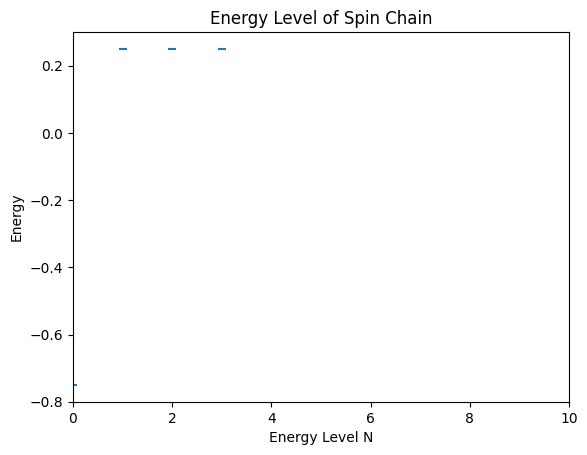

In [75]:
plt.scatter(np.arange(0,len(energy_level)),energy_level,marker='_')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
#plt.ylim(-5,-4)
plt.xlim(0,10)
plt.title('Energy Level of Spin Chain')

<font  face=Times color=darkblue size=3> Then we find the ground state by searching for the lowest energy.

### Renyi Entropy

$S^{(n)}_A = \frac{1}{1-n} \ln (Tr (\rho_A^n))$.

It can be analytically reduced to the Von Neumann Entanglement entropy when $n\to 1$,

$S^{vN}_A=-Tr(\rho_A \ln \rho_A)$

In [76]:
def cal_renyi(psi,si,L,order):
  size1 = 2**(si)
  size2 = 2**(L-si)
  psi = psi.reshape((size1,size2))
  #reduced density matrix
  rho_r = psi@psi.T
  # print(rho_r)
  # print(np.linalg.eig(rho_r)[0])
  prob = np.linalg.eig(rho_r)[0]/np.trace(rho_r)
  renyi = (1/(1-order))*np.log(np.sum(prob**order))
  return renyi


#### Another way to flip spins

In [77]:
# for a string '00001', if we flip the index 3 and 4
str_='00001'
# instead of concatenation, we can convert it to list first
site_3=str_[3]
site_4=str_[4]
list_=list(str_)
print(list_)
list_[3]=site_4
list_[4]=site_3
#convert it back to string
str_=''.join(list_)
str_

['0', '0', '0', '0', '1']


'00010'

therefore, to construct the Hamiltonian:

In [106]:
# Matrix Construction
H=np.zeros((dimension,dimension))
for a in range(dimension):
    state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain # make the length equal to N
# for PBC, we set i in range(N)
# for OBC, we set i in range(N-1)
    for i in range(N-1):
        j=np.mod(i+1,N)
        if state_chain[i]==state_chain[j]: # i=j only diagonal elements
            H[a,a]+=0.25
        else:                              # else, the raising/lowering operators also have contributions
            H[a,a]-=0.25
            # then exchange i,j
            element_i=state_chain[i]
            element_j=state_chain[j]
            #flip
            chain1=list(state_chain)
            chain1[i]=element_j
            chain1[j]=element_i
            b=int(''.join(chain1),2)
            H[a,b]+=0.5

In [107]:
eig_value=np.real(np.linalg.eig(H)[0])# eigen_values
eig_vec=np.real(np.linalg.eig(H)[1])  # eigenstates
# ground state wave function
idx_sorted1 = np.argsort(eig_value)
eig_value=eig_value[idx_sorted1]
eig_vec=eig_vec[:,idx_sorted1]
eig_value[0], eig_vec[:,0]

(-0.7499999999999999,
 array([ 0.        ,  0.70710678, -0.70710678,  0.        ]))

Text(0.5, 1.0, 'Energy Level of Spin Chain')

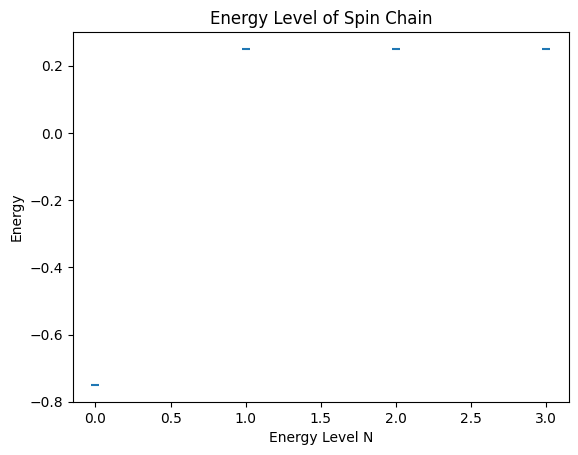

In [108]:
energy_level=np.sort(eig_value)
plt.scatter(np.arange(0,len(energy_level)),energy_level,marker='_')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
plt.title('Energy Level of Spin Chain')

### measurement

<font  face=Times color=darkblue size=3> To measure observables, we take $S^z$ as an example. The expectation value of the n:th eigenstate is $$<n|S^z|n>=[U^{\dagger}S^zU]_{nn}$$ where U is the matrix whose columns are the eigenvectors. <br> To construct the matrix of the operator, the method is quite similar to that of hamiltonian, but there is only diagonal elements: $S^z_{aa}=+\frac{1}{2}n-\frac{1}{2}(N-n)$.

<font  face=Times color=darkblue size=3> We measure both the  $\langle S_z\rangle$ and $\langle S_{total}^2\rangle$, for the latter, we only have it for 2-site OBC problem.

In [109]:
matrix_U=np.zeros((dimension,dimension)) #mat_U
matrix_Udag=np.zeros((dimension,dimension))
for i in range(dimension):
    matrix_U[:,i]=eig_vec[:,i].reshape(dimension)
    matrix_Udag[i,:]=np.conj(eig_vec[:,i].reshape(dimension))

In [110]:
mat_Sz=np.zeros((dimension,dimension))
mat_S2=np.zeros((dimension,dimension))

In [112]:
##construct Sz matrix
for a in range(dimension):
    state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain #make the length equal to N
    up_number=state_chain.count('1')
    down_number=N-up_number
    mat_Sz[a,a]=0.5*up_number-0.5*down_number

mat_S2=3/2*np.identity(dimension)+2*H              # this measurement is written for N=2 only

In [113]:
mat_Sz

array([[-1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [114]:
mat_S2

array([[2., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 2.]])

In [115]:
mz_list=[]
s2_list=[]
for i in range(dimension):
    mz_list.append(np.dot(np.dot(matrix_Udag,mat_Sz),matrix_U)[i,i])#measure
    s2_list.append(np.dot(np.dot(matrix_Udag,mat_S2),matrix_U)[i,i])#measure s^2

In [116]:
mz_list

[0.0, -1.0, 1.0, 0.0]

In [117]:
s2_list

[4.930380657631324e-32, 2.0, 2.0, 1.9999999999999996]

<font  face=Times color=darkblue size=3> The ground state is non-degenerate, while the 1st excited states are degenerate (for 2 site problem).

<font  face=Times color=darkblue size=3> Now, we see that for the antiferromagnet, the $S^z$ is generally equal to $0$ at ground state if N is even. And we can also see the $S_z$ at the triplet.
    <br><br> You can check the value of $S_z$ if N is odd.